In [1]:
# Import necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr

import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [3]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [4]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())

print("The no data value is:", dtm_pre_arr.rio.nodata)

dtm_pre_arr.shape


The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)
The no data value is: -3.4028235e+38


(1, 2000, 4000)

In [5]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

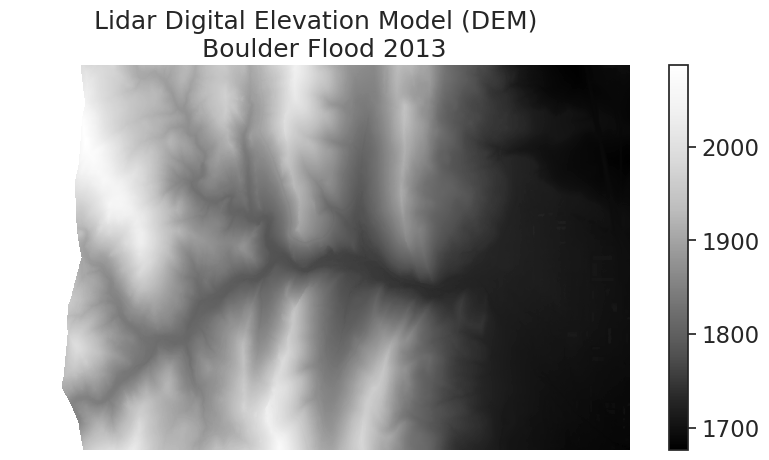

In [6]:
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

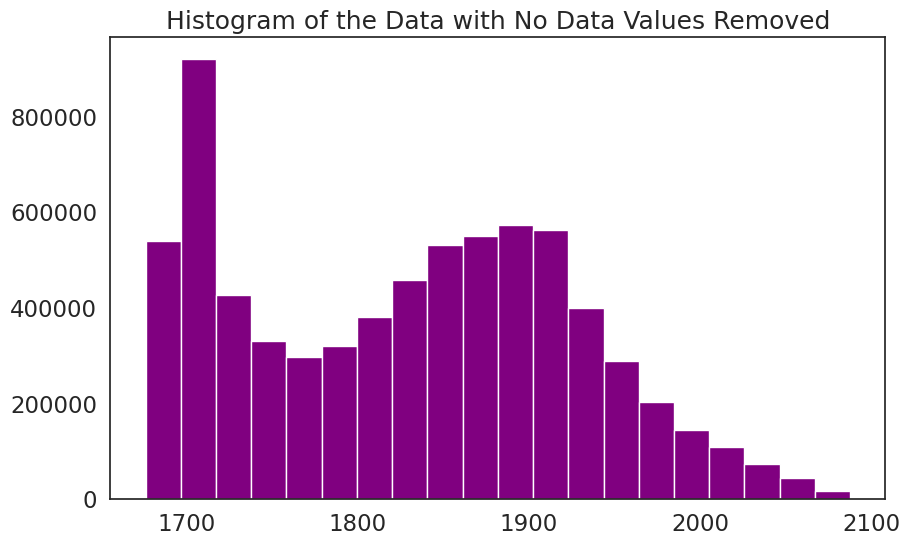

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple",
                      bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()